In [1]:
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
pd.DataFrame(boston.data, columns=boston.feature_names)

/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs = train_test_split(boston.data, boston.target, test_size=0.2)
pd.DataFrame(train_data_bs, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04113,25.0,4.86,0.0,0.4260,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
1,0.18337,0.0,27.74,0.0,0.6090,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
2,0.13158,0.0,10.01,0.0,0.5470,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
3,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
4,4.81213,0.0,18.10,0.0,0.7130,6.701,90.0,2.5975,24.0,666.0,20.2,255.23,16.42
5,0.19539,0.0,10.81,0.0,0.4130,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54
6,0.11504,0.0,2.89,0.0,0.4450,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34
7,1.22358,0.0,19.58,0.0,0.6050,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
8,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56
9,0.34940,0.0,9.90,0.0,0.5440,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97


In [4]:
pd.DataFrame(test_data_bs, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9.39063,0.0,18.10,0.0,0.7400,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88
1,10.83420,0.0,18.10,0.0,0.6790,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
2,0.09604,40.0,6.41,0.0,0.4470,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.67180,0.0,18.10,0.0,0.7400,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98
4,0.66351,20.0,3.97,0.0,0.6470,7.333,100.0,1.8946,5.0,264.0,13.0,383.29,7.79
5,1.25179,0.0,8.14,0.0,0.5380,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02
6,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
7,0.46296,0.0,6.20,0.0,0.5040,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25
8,0.10153,0.0,12.83,0.0,0.4370,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
9,0.01432,100.0,1.32,0.0,0.4110,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95


In [5]:
pd.DataFrame(train_labels_bs)

,0
0,28.0
1,7.0
2,21.2
3,15.0
4,16.4
5,23.4
6,21.4
7,41.3
8,39.8
9,20.3


In [6]:
pd.DataFrame(test_labels_bs)

,0
0,12.8
1,7.5
2,32.0
3,11.8
4,36.0
5,13.6
6,18.9
7,31.7
8,20.0
9,31.6


In [7]:
forest = RandomForestRegressor()
forest.fit(train_data_bs, train_labels_bs)

train_labels_pred = forest.predict(train_data_bs)
test_labels_pred = forest.predict(test_data_bs)
pd.DataFrame(train_labels_pred)

,0
0,28.45
1,8.48
2,21.33
3,16.19
4,15.94
5,23.25
6,21.51
7,41.16
8,39.91
9,20.49


In [8]:
forest.score(test_data_bs, test_labels_bs)

0.7651405994912835

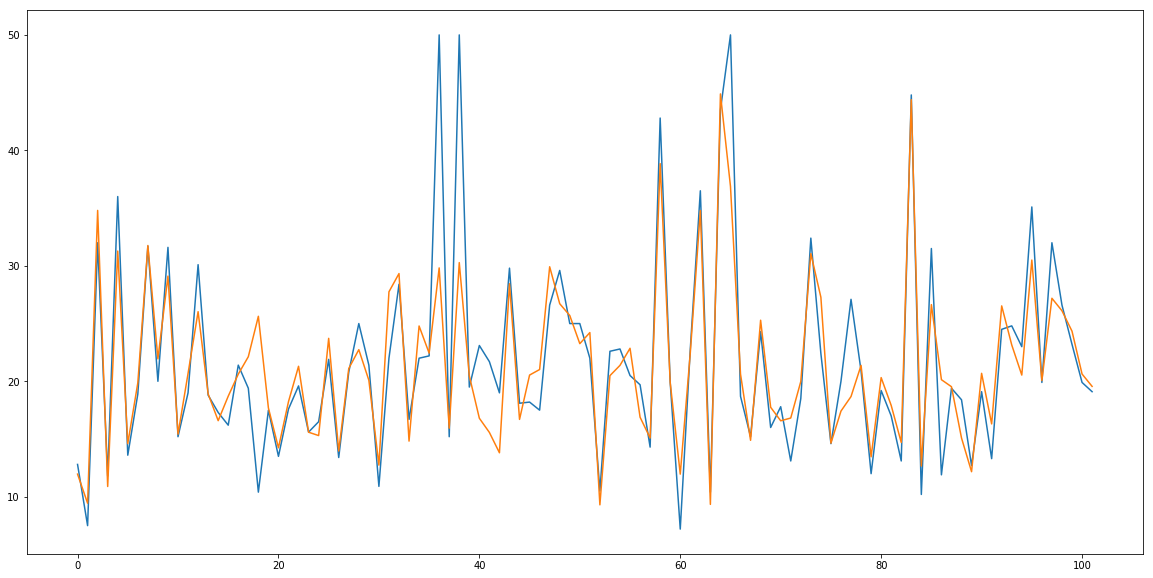

In [9]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(test_labels_pred, label="predicted")

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [3, 10, 100, 1000, 10000], 'n_jobs': [-1]}
cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    cv=10,
    scoring='mean_squared_error',
    n_jobs=-1,
    verbose=True
)
cv.fit(train_data_bs, train_labels_bs)

train_labels_pred = cv.predict(train_data_bs)
test_labels_pred = cv.predict(test_data_bs)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_erro

/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_erro

/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_erro

/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/jumpei/.local/share/virtualenvs/ttt-WxkWoWIb/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_erro

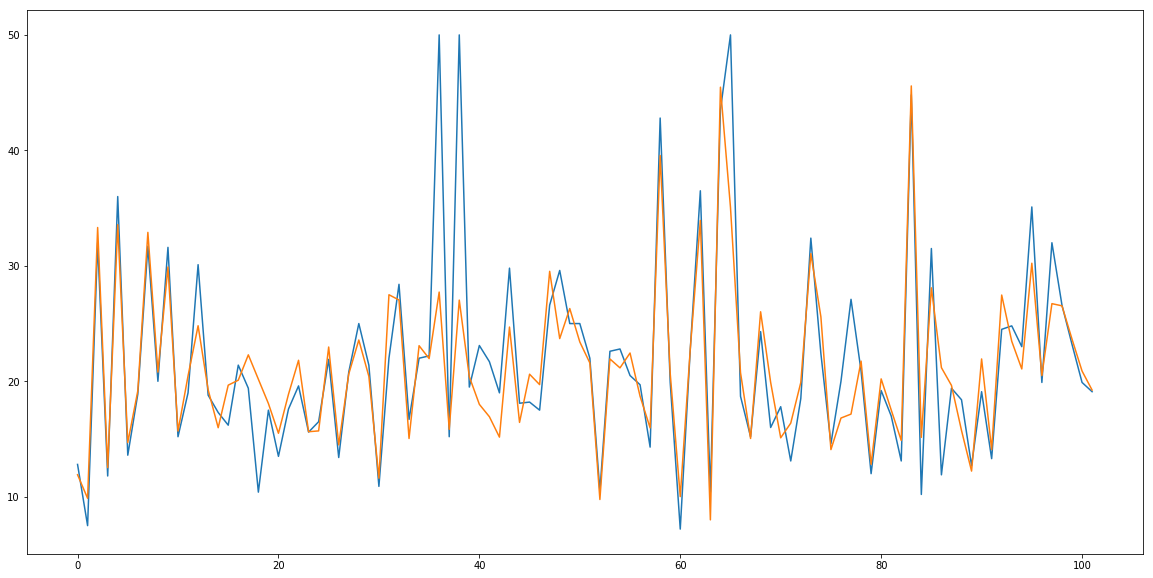

In [11]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(test_labels_pred, label="predicted")